In [1]:
%matplotlib inline
from kbmodpy import kbmod as kb
import numpy as np
import matplotlib.pyplot as plt

In [10]:
p = kb.psf(1.9)
imcount = 20
image_dim = 2000
noise = 10
object_flux = 150.0
object_x = 100.7
object_y = 150.3
object_xv = 50
object_yv = 35
imlist =  []
for i in range(imcount):
    imlist.append(kb.layered_image(
        "t"+str(i), 1000, 1000, noise, noise*noise, i/imcount))

In [11]:
for im in imlist:
    im.add_object(object_x+im.get_time()*object_xv, object_y+im.get_time()*object_yv, object_flux, p)

In [12]:
stack = kb.image_stack(imlist)
del imlist

In [13]:
search = kb.stack_search(stack, p)
del stack
search.set_debug(True)

In [14]:
#search.gpu( 80, 80, 0.2, 1.0, 50, 75, 10 )

In [15]:
results = search.region_search(55, 30, 15, 10.0, 10)
results

[ix: 101.000000 iy: 150.000000 fx: 148.000000 fy: 183.000000 depth: 0 obs_count: 20 lh: 10.252689 flux 156.301102]

In [16]:
#search.get_results(0, 10)

In [22]:
stamps = search.psi_stamps(results[0], 10)

In [23]:
psis, phis = search.lightcurve(results[0])

Starting at 0


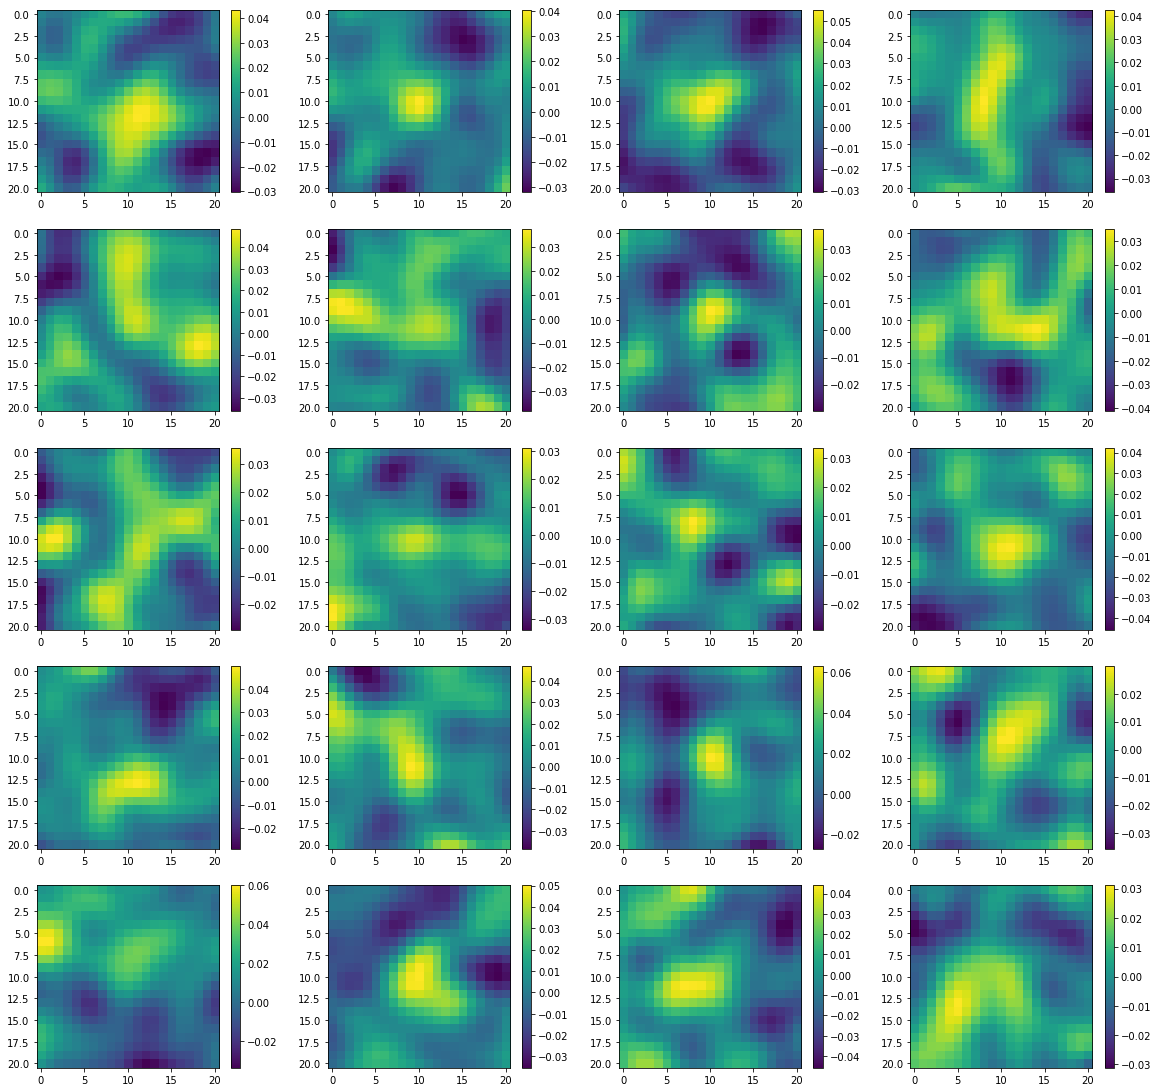

In [24]:
fig = plt.figure(figsize=(20, 100))
set_on = 1
plot_count = len(stamps)
print ('Starting at %i' % int((set_on - 1)*plot_count))
for i in range((set_on-1)*plot_count,set_on*plot_count):
    fig.add_subplot(25,4,i-(set_on-1)*plot_count+1)
    plt.imshow(stamps[i], #cmap=plt.cm.Greys_r, 
               interpolation=None)
    plt.colorbar()

In [25]:
#plt.figure(figsize=[12,12])
###imlist[0].convolve(p)
#plt.imshow(imlist[0].science())
#plt.gca().invert_yaxis()
#plt.colorbar()

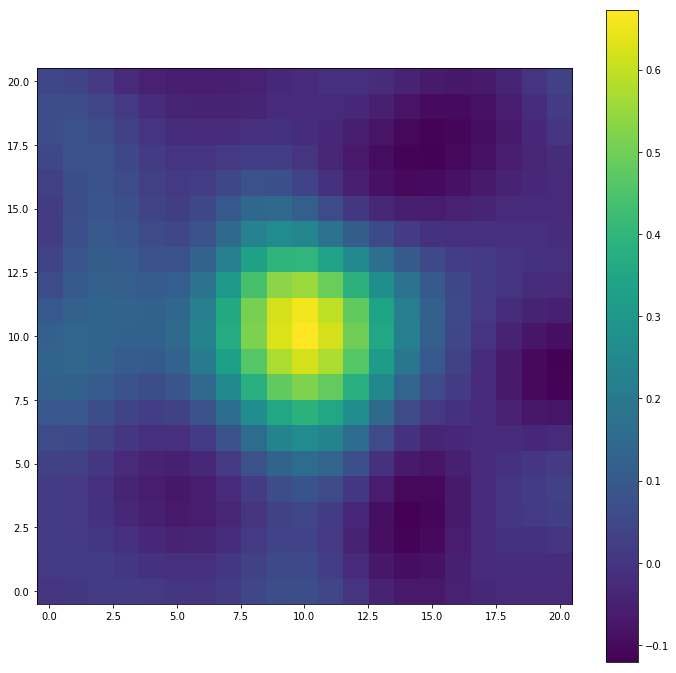

In [26]:
stacked = np.sum(np.array(s) for s in stamps)
plt.figure(figsize=[12,12])
plt.imshow(stacked)
plt.gca().invert_yaxis()
plt.colorbar()